In [1]:
import pandas  as pd 
import numpy   as np
import seaborn as sns

import matplotlib.pyplot as plt

## Abrir arquivo

In [2]:
df = pd.read_csv('MAO2018INMET.csv')

In [3]:
df.head() # cabeçalho

,data,hora,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_vel,vento_direcao,vento_rajada,radiacao,precipitacao
0,01/01/2018,0,24.9,25.4,24.8,88,89,87,22.9,23.2,22.8,1003.5,1003.5,1002.8,////,////,////,-3.08,0.0
1,01/01/2018,1,24.9,25.0,24.7,89,89,88,22.9,23.1,22.8,1004.9,1004.9,1003.5,////,////,////,-2.19,0.0
2,01/01/2018,2,24.7,25.0,24.6,90,90,89,23.0,23.1,22.8,1004.7,1005.1,1004.7,////,////,////,-1.51,0.0
3,01/01/2018,3,24.4,24.7,24.1,92,92,90,22.9,23.0,22.6,1005.0,1005.1,1004.7,////,////,////,-1.31,0.0
4,01/01/2018,4,24.4,24.6,24.2,92,92,91,23.0,23.1,22.8,1005.2,1005.2,1005.0,////,////,////,-1.28,0.0


In [4]:
print("Número de Valores (linhas):", df.shape[0],'\n'
      "Número de Variáveis (colunas):", df.shape[1])

Número de Valores (linhas): 8682 
Número de Variáveis (colunas): 19


In [5]:
#df['data'].unique() # todas as datas 

In [6]:
print("Quantidade de dias:", df['data'].unique().shape[0])

Quantidade de dias: 365


Converter array de datas (importante para agrupar e fazer os cálculos depois)

In [7]:
datas = pd.to_datetime(df['data'], format='%d/%m/%Y')

In [8]:
dia = pd.DatetimeIndex(datas).day
mes = pd.DatetimeIndex(datas).month

## Média Diária

In [9]:
mediadiaria = df.groupby(datas) # agrupar por todos os dias

In [10]:
#mediadiaria.groups.keys()

In [11]:
mediadiaria = mediadiaria.mean() # média diária

In [12]:
temp_inst_dia =  mediadiaria['temp_inst']
temp_max_dia  =  mediadiaria['temp_max']
temp_min_dia  =  mediadiaria['temp_min']

## Média Mensal

In [13]:
mediamensal = df.groupby(mes)

In [14]:
mediamensal = mediamensal.mean()

## Acumulado Diário

In [15]:
acmdiario = df.groupby(datas) # agrupar por todos os dias

In [16]:
acmdiario = acmdiario.sum() # acumulado diário

In [17]:
prpdiaria = acmdiario['precipitacao']

## Acumulado Mensal

In [18]:
acmmensal = df.groupby(mes) # agrupar por todos os meses

In [19]:
acmmensal.groups.keys()
##acmmensal.get_group(12)

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [20]:
acmmensal = acmmensal.sum() # acumulado mensal

In [21]:
prpmensal = acmmensal['precipitacao']

In [22]:
prpmensal.shape

(12,)

## Normal Climatológica de Acumulado de Precipitação 

Fonte: INMET

In [23]:
normal = np.array([287., 295.1, 300., 319., 246.9, 118.3,
                   75.4, 64.3, 76.3, 104.1, 169.2, 245.6]) 

## Plotar Gráficos

In [24]:
sns.set(style='darkgrid')

x = np.arange(len(prpmensal))
width = 0.3

meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN',
         'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']

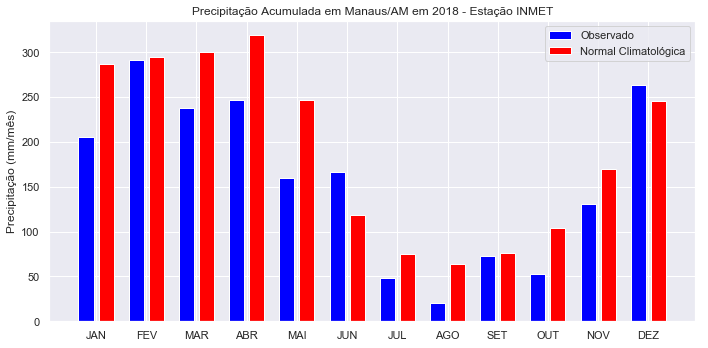

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

obs = ax.bar(x- 0.2, prpmensal, width, color='blue',align='center')
nrm = ax.bar(x+ 0.2, normal, width, color='red', align='center')

ax.legend( (obs[0], nrm[0]),
           ('Observado', 'Normal Climatológica'),
           fontsize=11
         )

plt.xticks(x, meses)

plt.ylabel('Precipitação (mm/mês)')

plt.title('Precipitação Acumulada em Manaus/AM em 2018 - Estação INMET')

plt.tight_layout()
plt.savefig('prpmao2018.png', dpi=300)
plt.show()